In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('/content/heart.csv')
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.shape

(918, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


<Axes: >

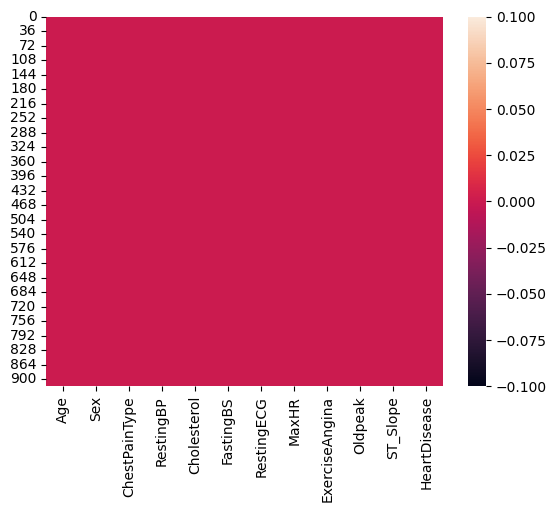

In [ ]:
print(df.isnull().sum())
sns.heatmap(df.isnull())


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410


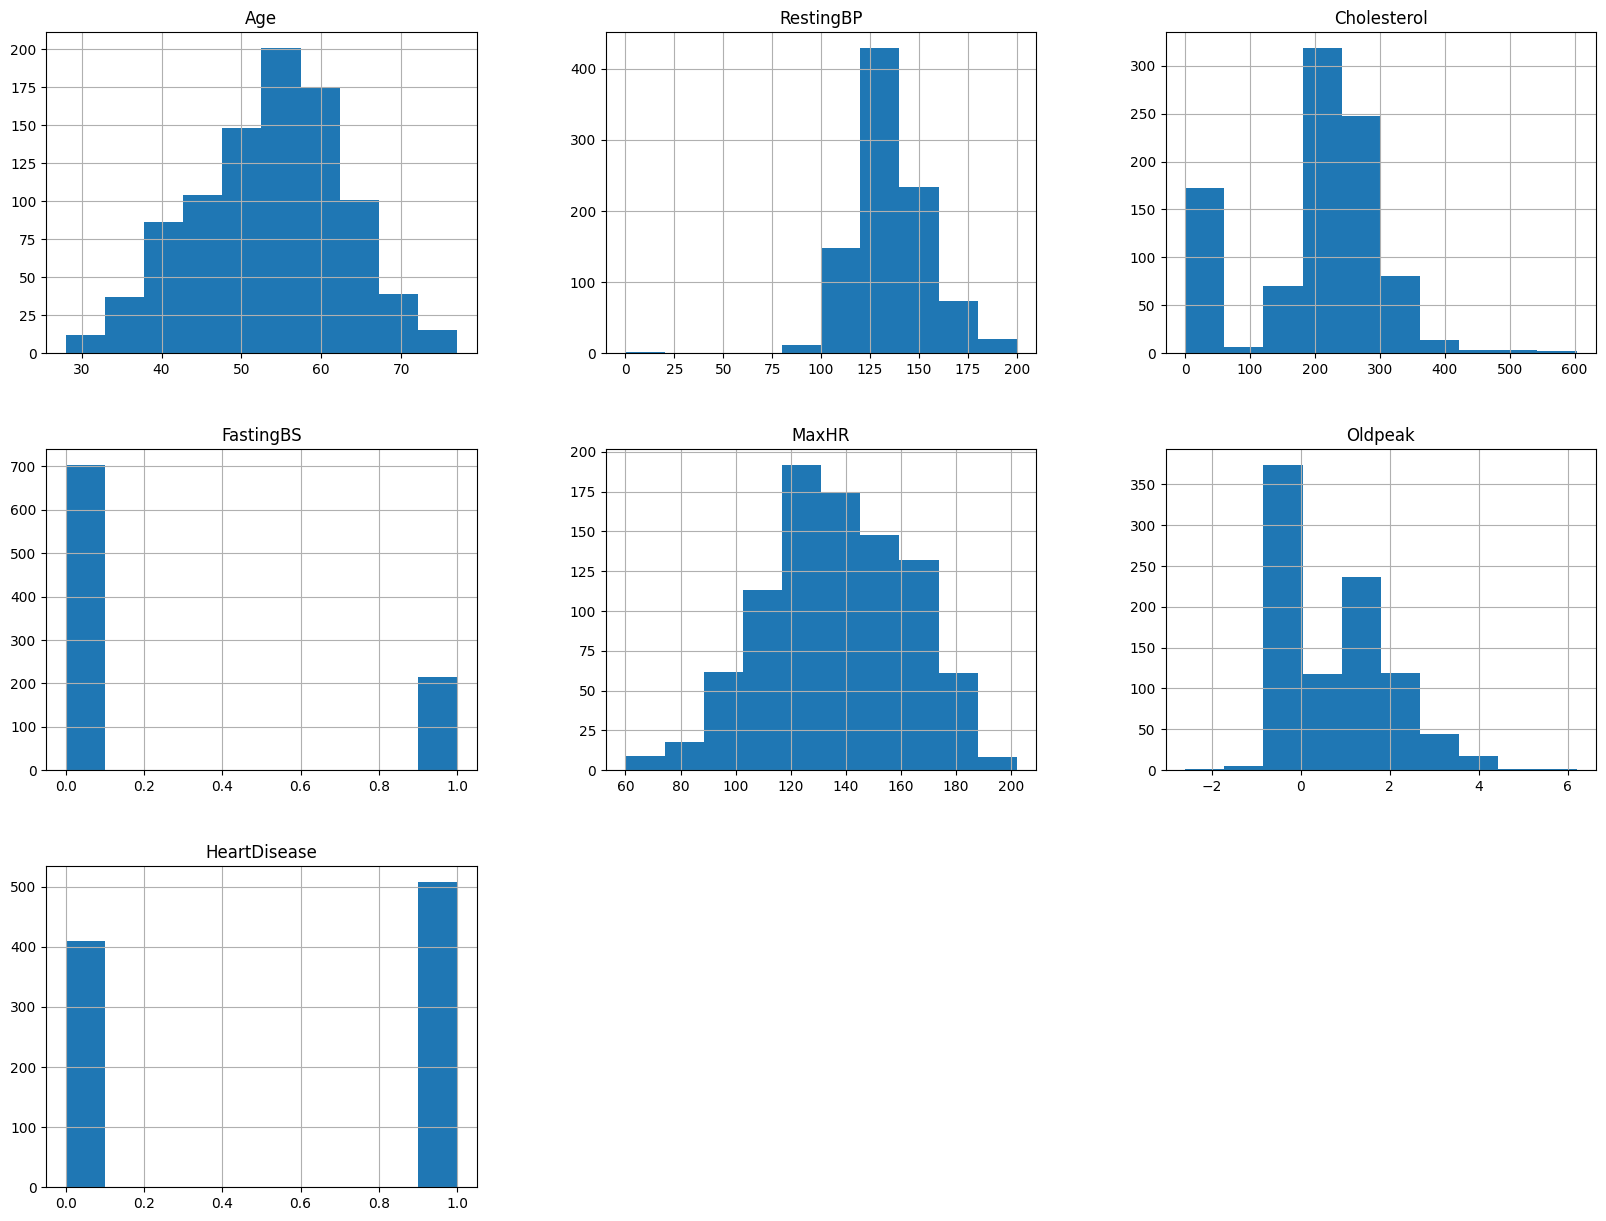

In [ ]:
df.hist(figsize=(20,15))
plt.show()

In [ ]:
#correlation=df.corr()----ValueError: could not convert string to float: 'M'
correlation = df.select_dtypes(include=["number"]).corr()


<Axes: >

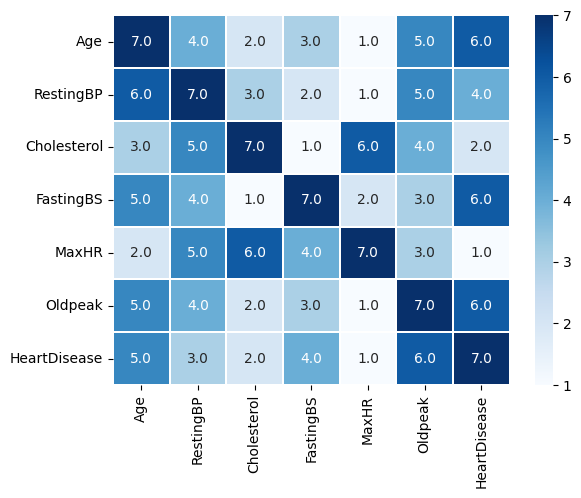

In [ ]:
sns.heatmap(correlation.rank(axis='columns'),annot=True,cmap='Blues',fmt='.1f',linewidths=.2)

**preprocessing**


In [ ]:
# نسخ البيانات
df_encoded = df.copy()

# ترميز ثنائي
df_encoded["Sex"] = df_encoded["Sex"].map({"M": 1, "F": 0})
df_encoded["ExerciseAngina"] = df_encoded["ExerciseAngina"].map({"Y": 1, "N": 0})

# ترميز ترتيبي
df_encoded["ST_Slope"] = df_encoded["ST_Slope"].map({"Down": 0, "Flat": 1, "Up": 2})

# One-hot encoding للفئات غير المرتبة
df_encoded = pd.get_dummies(df_encoded, columns=["ChestPainType", "RestingECG"], drop_first=True)


In [ ]:
# نسخ البيانات
df_encoded = df.copy()

# ترميز ثنائي
df_encoded["Sex"] = df_encoded["Sex"].map({"M": 1, "F": 0})
df_encoded["ExerciseAngina"] = df_encoded["ExerciseAngina"].map({"Y": 1, "N": 0})

# ترميز ترتيبي
df_encoded["ST_Slope"] = df_encoded["ST_Slope"].map({"Down": 0, "Flat": 1, "Up": 2})

# One-hot encoding للفئات غير المرتبة
df_encoded = pd.get_dummies(df_encoded, columns=["ChestPainType", "RestingECG"], drop_first=True)

# Fix: Assign the entire df_encoded back to df
df = df_encoded

Model

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [ ]:
x=df.drop('HeartDisease',axis=1)
y=df['HeartDisease']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [ ]:
def Model(model):
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(confusion_matrix(y_test,y_pred))
  print(classification_report(y_test,y_pred))


In [ ]:
model1=KNeighborsClassifier()
Model(model1)

[[55 22]
 [32 75]]
              precision    recall  f1-score   support

           0       0.63      0.71      0.67        77
           1       0.77      0.70      0.74       107

    accuracy                           0.71       184
   macro avg       0.70      0.71      0.70       184
weighted avg       0.71      0.71      0.71       184



In [ ]:
model2=DecisionTreeClassifier()
Model(model2)

[[62 15]
 [15 92]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        77
           1       0.86      0.86      0.86       107

    accuracy                           0.84       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



In [ ]:
model3=GaussianNB()
Model(model3)

[[66 11]
 [21 86]]
              precision    recall  f1-score   support

           0       0.76      0.86      0.80        77
           1       0.89      0.80      0.84       107

    accuracy                           0.83       184
   macro avg       0.82      0.83      0.82       184
weighted avg       0.83      0.83      0.83       184



In [ ]:
model4=SVC()
Model(model4)

[[54 23]
 [35 72]]
              precision    recall  f1-score   support

           0       0.61      0.70      0.65        77
           1       0.76      0.67      0.71       107

    accuracy                           0.68       184
   macro avg       0.68      0.69      0.68       184
weighted avg       0.69      0.68      0.69       184



In [ ]:
model5=RandomForestClassifier()
Model(model5)

[[65 12]
 [14 93]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        77
           1       0.89      0.87      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



In [ ]:
model6=GradientBoostingClassifier()
Model(model6)

[[65 12]
 [12 95]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        77
           1       0.89      0.89      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184

